In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
old_basemap_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/dev/nagaoka/step1/nagaoka_basemap.parquet"
old_basemap = gpd.read_parquet(old_basemap_path)

new_basemap_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/dev_2025/data_processor/15202/basemap/15202.parquet"
new_basemap = gpd.read_parquet(new_basemap_path)
#新旧同じ値

In [13]:
old_plateau_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/dev/nagaoka/step2/nagaoka_plateau.parquet"
old_plateau = gpd.read_parquet(old_plateau_path)

new_plateau_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/dev_2025/data_processor/15202/plateau/15202.parquet"
new_plateau = gpd.read_parquet(new_plateau_path)
#新しい方が45件少ない

latest_plateau_path = "//Akiyamalab_02/Akiyamalab02/PLATEAU/Data_parquet/15202/15202.parquet"
latest_plateau = gpd.read_parquet(latest_plateau_path)

In [16]:
old_feature_path = 'G:/マイドライブ/akiyamalab/オープン住宅地図/dev/nagaoka/予測/feature.csv'
old_feature = pd.read_csv(old_feature_path, encoding='cp932')

new_feature_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/dev_2025/feature_engineering/15202.parquet"
new_feature = gpd.read_parquet(new_feature_path)

In [123]:
area_path = "G:/マイドライブ/akiyamalab/オープン住宅地図/code_data/EDA/step4/小地域ポリゴン/A002005212020DDSWC15202/r2ka15202.shp"
area = gpd.read_file(area_path)

In [129]:
area.to_crs(crs='EPSG:4326', inplace=True)
test = gpd.sjoin(new_basemap, area, how='left', predicate='within')

In [131]:
test.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 192094 entries, 0 to 192093
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   type         192094 non-null  object  
 1   geometry     192094 non-null  geometry
 2   index_right  190639 non-null  float64 
 3   KEY_CODE     190639 non-null  object  
 4   PREF         190639 non-null  object  
 5   CITY         190639 non-null  object  
 6   S_AREA       190639 non-null  object  
 7   PREF_NAME    190639 non-null  object  
 8   CITY_NAME    190639 non-null  object  
 9   S_NAME       190639 non-null  object  
 10  KIGO_E       4352 non-null    object  
 11  HCODE        190639 non-null  float64 
 12  AREA         190639 non-null  float64 
 13  PERIMETER    190639 non-null  float64 
 14  R2KAxx       190639 non-null  float64 
 15  R2KAxx_ID    190639 non-null  float64 
 16  KIHON1       190639 non-null  object  
 17  DUMMY1       190639 non-null  object  
 18  K

In [112]:
need_col = [
                    'area', 'perimeter', 'rectangle', 
                    'type_堅ろう建物', 'type_堅ろう無壁舎', 'type_普通建物', 'type_普通無壁舎', 
                    'usage_area_1.0', 'usage_area_2.0','usage_area_3.0', 'usage_area_4.0', 'usage_area_5.0', 
                    'usage_area_6.0', 'usage_area_7.0', 'usage_area_8.0', 'usage_area_9.0', 'usage_area_10.0',
                    'usage_area_11.0', 'usage_area_12.0', 'usage_area_21.0', 'usage_area_99.0',
                    'target']

new_feature = new_feature[need_col]

In [13]:
old_feature['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151686 entries, 0 to 151685
Series name: target
Non-Null Count   Dtype
--------------   -----
151686 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [15]:
old_plateau.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165390 entries, 0 to 165389
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   gml_id              153993 non-null  object  
 1   creationDate        165390 non-null  object  
 2   class               165374 non-null  float64 
 3   usage               121889 non-null  float64 
 4   measuredHeight      160204 non-null  float64 
 5   measuredHeight_uom  160204 non-null  object  
 6   srcScale            165390 non-null  int64   
 7   thematicSrcDesc     165390 non-null  int64   
 8   buildingHeight      121889 non-null  float64 
 9   buildingHeight_uom  121889 non-null  object  
 10  surveyYear          165380 non-null  float64 
 11  buildingID          165390 non-null  object  
 12  prefecture          165390 non-null  int64   
 13  city                165390 non-null  int64   
 14  geometry            165390 non-null  geometry
dtypes: float6

In [14]:
new_plateau.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165345 entries, 0 to 165344
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        165345 non-null  object  
 1   class     165331 non-null  object  
 2   usage     121855 non-null  object  
 3   geometry  165345 non-null  geometry
dtypes: geometry(1), object(3)
memory usage: 5.0+ MB


In [9]:
new_plateau.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165345 entries, 0 to 165344
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        165345 non-null  object  
 1   class     165331 non-null  float64 
 2   usage     121855 non-null  float64 
 3   geometry  165345 non-null  geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 5.0+ MB


In [9]:
new_feature['usage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151686 entries, 0 to 151685
Series name: usage
Non-Null Count  Dtype  
--------------  -----  
96658 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [17]:
new_feature['usage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151686 entries, 0 to 151685
Series name: usage
Non-Null Count  Dtype  
--------------  -----  
96658 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [24]:
new_feature[(new_feature['usage'] != 411) & (new_feature['usage'] != 412)]['usage'].value_counts().sum()

18390

In [17]:
new_feature['usage'].value_counts()

usage
411    73548
412     4367
441     4071
413     2969
422     2788
401     2504
402     1997
451     1929
431     1133
452      269
414      268
415      194
421      171
403      106
454      102
404       78
461        1
Name: count, dtype: int64

In [10]:
new_feature['usage'].value_counts()

usage
411.0    73917
412.0     4351
441.0     4025
413.0     2953
422.0     2707
401.0     2507
402.0     1988
451.0     1917
431.0     1118
452.0      267
414.0      264
415.0      189
421.0      171
403.0      104
454.0      101
404.0       78
461.0        1
Name: count, dtype: int64

In [20]:
new_feature['usage'].value_counts()

usage
411.0    73917
412.0     4351
441.0     4025
413.0     2953
422.0     2707
401.0     2507
402.0     1988
451.0     1917
431.0     1118
452.0      267
414.0      264
415.0      189
421.0      171
403.0      104
454.0      101
404.0       78
461.0        1
Name: count, dtype: int64

In [142]:
new_feature[new_feature['年少人口'].isna()]

,geometry,KEY_CODE,PREF_NAME,CITY_NAME,S_NAME,年少人口,生産年齢人口,老年人口,出生時から,1年未満,...,1_amenity,1_shop,1_tourism,3_amenity,3_shop,3_tourism,5_amenity,5_shop,5_tourism,target
655,"POLYGON ((32395.424 138068.120, 32391.704 1380...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
736,"POLYGON ((17885.381 143624.771, 17884.870 1436...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
798,"POLYGON ((19463.124 147154.637, 19457.945 1471...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
935,"POLYGON ((18231.693 145444.141, 18220.053 1454...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
998,"POLYGON ((17964.502 143544.204, 17965.112 1435...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151308,"POLYGON ((51455.853 168050.686, 51456.873 1680...",152024950,新潟県,長岡市,塩中,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
151323,"POLYGON ((45990.057 166915.329, 45988.079 1669...",None,None,None,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0
151413,"POLYGON ((51287.754 167971.516, 51283.173 1679...",152024950,新潟県,長岡市,塩中,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
151436,"POLYGON ((51457.942 168052.015, 51457.372 1680...",152024950,新潟県,長岡市,塩中,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [147]:
new_feature_small_notNA = new_feature[~new_feature['年少人口'].isna()]
new_feature_small_NA = new_feature[new_feature['年少人口'].isna()]

new_feature_small_notNA_path = 'G:/マイドライブ/akiyamalab/オープン住宅地図/dev_2025/test/feature_small_notNA.parquet'
new_feature_small_NA_path = 'G:/マイドライブ/akiyamalab/オープン住宅地図/dev_2025/test/feature_small_NA_path.parquet'
new_feature_small_notNA.to_parquet(
        new_feature_small_notNA_path,
        index=False,
        compression="brotli",
        )
new_feature_small_NA.to_parquet(
        new_feature_small_NA_path,
        index=False,
        compression="brotli",
        )

In [118]:
new_feature[new_feature['年少人口'].isna()]

,geometry,buildingID,class,usage,area,perimeter,rectangle,type_堅ろう建物,type_堅ろう無壁舎,type_普通建物,...,20年以上,居住期間「不詳」,00_総数,01_500万円未満,07_500～1000万円未満,09_1000以上,一戸建,長屋建,共同住宅,target
1167,"POLYGON ((18922.282 146898.337, 18912.303 1469...",None,NaN,NaN,2563.505291,203.069185,4.010762,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1271,"POLYGON ((19408.297 147850.308, 19416.217 1478...",None,NaN,NaN,825.293908,140.719069,4.898337,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1318,"POLYGON ((19254.103 146956.029, 19263.403 1469...",None,NaN,NaN,642.154297,105.925653,4.180050,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1336,"POLYGON ((19201.768 146953.813, 19202.503 1469...",None,NaN,NaN,627.466619,154.322330,6.160748,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1358,"POLYGON ((18250.420 147894.044, 18240.058 1478...",None,NaN,NaN,589.674101,98.560851,4.058807,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126389,"POLYGON ((51364.803 168140.404, 51369.703 1681...",None,NaN,NaN,28.569095,21.442891,4.011761,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1126506,"POLYGON ((50874.830 167645.364, 50872.860 1676...",None,NaN,NaN,26.776934,26.502632,5.121634,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1126524,"POLYGON ((50764.921 167825.254, 50762.831 1678...",None,NaN,NaN,26.276874,20.938985,4.084781,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1126531,"POLYGON ((50877.030 167689.064, 50872.520 1676...",None,NaN,NaN,26.211976,20.715955,4.046272,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [113]:
new_feature

,area,perimeter,rectangle,type_堅ろう建物,type_堅ろう無壁舎,type_普通建物,type_普通無壁舎,usage_area_1.0,usage_area_2.0,usage_area_3.0,...,usage_area_6.0,usage_area_7.0,usage_area_8.0,usage_area_9.0,usage_area_10.0,usage_area_11.0,usage_area_12.0,usage_area_21.0,usage_area_99.0,target
0,361.153107,95.460284,5.023160,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,315.249045,98.150827,5.527988,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,273.620985,66.421657,4.015457,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,267.156468,87.867041,5.375801,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,256.600336,68.433961,4.272116,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151681,25.150990,20.169409,4.021755,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151682,25.139741,20.055849,4.000006,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151683,25.125094,20.147678,4.019492,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151684,25.117491,20.105850,4.011754,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
old_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151686 entries, 0 to 151685
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   年少人口             149523 non-null  float64
 1   生産年齢人口           149523 non-null  float64
 2   老年人口             149523 non-null  float64
 3   出生時から            149523 non-null  float64
 4   1年未満             149523 non-null  float64
 5   1年以上5年未満         149523 non-null  float64
 6   5年以上10年未満        149523 non-null  float64
 7   10年以上20年未満       149523 non-null  float64
 8   20年以上            149523 non-null  float64
 9   居住期間「不詳」         149523 non-null  float64
 10  01_500万円未満       149523 non-null  float64
 11  07_500～1000万円未満  149523 non-null  float64
 12  一戸建              149523 non-null  float64
 13  長屋建              149523 non-null  float64
 14  共同住宅             149523 non-null  float64
 15  unique_id        151686 non-null  int64  
 16  1_amenity        14368 non-null   floa

In [91]:
old_feature['1_amenity'].value_counts().sum()

14368

In [27]:
new_feature

,年少人口,生産年齢人口,老年人口,出生時から,1年未満,1年以上5年未満,5年以上10年未満,10年以上20年未満,20年以上,居住期間「不詳」,...,usage_area_6,usage_area_7,usage_area_8,usage_area_9,usage_area_10,usage_area_11,usage_area_12,usage_area_21,usage_area_99,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
151682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
151683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
151684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [50]:
new_plateau[~new_plateau['usage'].isna()]

,id,class,usage,geometry
0,bldg_726c824b-7b5d-48cb-a0c5-47c4299d74eb,3001.0,411.0,POINT (138.85949 37.23561)
1,bldg_62b3fc2e-b8c6-44fe-ae02-708f899b907e,3003.0,411.0,POINT (138.85175 37.23966)
3,bldg_b6e340fe-15d8-448e-8c52-195d7ec79ca1,3001.0,411.0,POINT (138.86002 37.23563)
5,bldg_9cc57b35-d0bb-4479-b869-435262e1bdc1,3003.0,422.0,POINT (138.85714 37.23876)
6,bldg_b1e44169-0abc-4033-b5d9-89d990c8d5ab,3003.0,451.0,POINT (138.85909 37.23984)
...,...,...,...,...
165337,bldg_d49e092c-0736-4b0e-96b9-9ba8ab5fdb0b,3001.0,411.0,POINT (139.01596 37.49243)
165338,bldg_e6e8ceb4-b252-4bd1-ab04-04ab0948cbaa,3001.0,411.0,POINT (139.01567 37.49212)
165340,bldg_c9ccfa06-b6d7-4603-b206-42e1593befbe,3001.0,411.0,POINT (139.01633 37.49250)
165341,bldg_5e16a970-5e0d-4eb5-a9d1-9b96f51cf8a5,3001.0,411.0,POINT (139.01467 37.49348)


In [57]:
from shapely.geometry import Point
def replace_geometry_with_centroid(gdf):
    # 各ポリゴンの重心を求める
    gdf['centroid'] = gdf['geometry'].centroid
    
    # 空のジオメトリに対処する
    gdf['geometry'] = gdf['centroid'].apply(lambda x: Point(x.x, x.y) if not x.is_empty else Point())
    
    # 重心カラムを削除する
    gdf = gdf.drop(columns=['centroid'])

    return gdf
    
new_plateau = replace_geometry_with_centroid(new_plateau)

C:\Users\0141s\AppData\Local\Temp\ipykernel_34656\142177573.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


In [58]:
from shapely import force_2d

# new_plateau['geometry'] = new_plateau['geometry'].apply(force_2d)
nagaoka_bldg = gpd.sjoin(new_basemap, new_plateau, how='left', predicate='contains')
nagaoka_bldg = nagaoka_bldg[~nagaoka_bldg.index.duplicated(keep='first')]

In [45]:
old_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192094 entries, 0 to 192093
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   type             192094 non-null  object 
 1   geometry         192094 non-null  object 
 2   class            145965 non-null  float64
 3   usage            111387 non-null  float64
 4   buildingID       145971 non-null  object 
 5   KEY_CODE         190639 non-null  float64
 6   PREF_NAME        190639 non-null  object 
 7   CITY_NAME        190639 non-null  object 
 8   S_NAME           190639 non-null  object 
 9   年少人口             189245 non-null  float64
 10  生産年齢人口           189245 non-null  float64
 11  老年人口             189245 non-null  float64
 12  出生時から            189245 non-null  float64
 13  1年未満             189245 non-null  float64
 14  1年以上5年未満         189245 non-null  float64
 15  5年以上10年未満        189245 non-null  float64
 16  10年以上20年未満       189245 non-null  floa

In [62]:
nagaoka_bldg[~nagaoka_bldg['usage'].isna()]

,type,geometry,index_right,id,class,usage
377,普通建物,"POLYGON ((138.85815 37.23887, 138.85817 37.238...",190.0,bldg_a0ce6f0c-de44-4ffa-bc00-4a95ff11b303,3001.0,422.0
378,普通建物,"POLYGON ((138.85173 37.24012, 138.85177 37.240...",254.0,bldg_324a47e3-083a-46ee-aa08-69e9ef85efb7,3001.0,441.0
379,普通建物,"POLYGON ((138.86519 37.24411, 138.86529 37.244...",474.0,bldg_9a0f5df2-48e2-402c-88be-ac349b65683f,3001.0,422.0
380,普通建物,"POLYGON ((138.85833 37.23866, 138.85834 37.238...",186.0,bldg_37388a68-42e5-4596-a9dd-53c9202f03be,3001.0,422.0
381,普通建物,"POLYGON ((138.85740 37.24926, 138.85745 37.249...",390.0,bldg_b9df0fbd-2328-499b-b160-d8a309c9d197,3001.0,441.0
...,...,...,...,...,...,...
189803,普通建物,"POLYGON ((139.01342 37.45315, 139.01342 37.453...",161824.0,bldg_bd245cdf-1a0b-4366-b015-cce4b48871f5,3001.0,452.0
189810,普通建物,"POLYGON ((139.01819 37.46880, 139.01821 37.468...",163637.0,bldg_4182c0c2-b280-415f-ad36-49223268baf4,3001.0,451.0
189825,普通建物,"POLYGON ((139.00781 37.45786, 139.00782 37.457...",161620.0,bldg_f2451540-1bdd-4e60-843e-57d470961929,3001.0,411.0
189834,普通建物,"POLYGON ((139.01325 37.45369, 139.01325 37.453...",161820.0,bldg_63954a85-02f0-42a4-bea4-0facf24965fd,3001.0,452.0


In [41]:
new_basemap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
nagaoka_bldg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 192094 entries, 0 to 192093
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   type         192094 non-null  object  
 1   geometry     192094 non-null  geometry
 2   index_right  318 non-null     float64 
 3   id           318 non-null     object  
 4   class        318 non-null     float64 
 5   usage        193 non-null     float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 10.3+ MB


In [ ]:
from shapely.validation import make_valid

# 無効なジオメトリを修正
new_plateau['geometry'] = new_plateau['geometry'].apply(lambda geom: make_valid(geom) if not geom.is_valid else geom)

In [13]:
# 無効なジオメトリを高速に修正（ベクトル化）
invalid_mask = ~new_plateau.is_valid
if invalid_mask.any():
    new_plateau.loc[invalid_mask, 'geometry'] = new_plateau.loc[invalid_mask, 'geometry'].make_valid()

In [14]:
new_plateau

,id,class,usage,geometry
0,bldg_726c824b-7b5d-48cb-a0c5-47c4299d74eb,3001.0,411.0,"POLYGON Z ((138.85948 37.23559 181.69006, 138...."
1,bldg_62b3fc2e-b8c6-44fe-ae02-708f899b907e,3003.0,411.0,"POLYGON Z ((138.85177 37.23961 163.91703, 138...."
2,bldg_fc435991-6181-4130-95a4-ec9a942620cb,3003.0,NaN,"POLYGON Z ((138.85286 37.23977 165.53303, 138...."
3,bldg_b6e340fe-15d8-448e-8c52-195d7ec79ca1,3001.0,411.0,"POLYGON Z ((138.86005 37.23566 179.76176, 138...."
4,bldg_ab6268f7-45c7-4c22-b6ff-3edebca23528,3003.0,NaN,"POLYGON Z ((138.85102 37.23980 164.86392, 138...."
...,...,...,...,...
165340,bldg_c9ccfa06-b6d7-4603-b206-42e1593befbe,3001.0,411.0,"POLYGON Z ((139.01634 37.49245 120.90859, 139...."
165341,bldg_5e16a970-5e0d-4eb5-a9d1-9b96f51cf8a5,3001.0,411.0,"POLYGON Z ((139.01467 37.49346 119.98754, 139...."
165342,bldg_26aa9096-6374-4411-8197-7a02c526b563,3001.0,NaN,"POLYGON Z ((139.01450 37.49325 119.60884, 139...."
165343,bldg_558cd9b6-a89f-4e2f-9b64-f7c447503fa8,3001.0,NaN,"POLYGON Z ((139.01549 37.49316 120.08264, 139...."


In [ ]:
new_plateau[new_plateau['geometry'] == ]

,id,class,usage,geometry


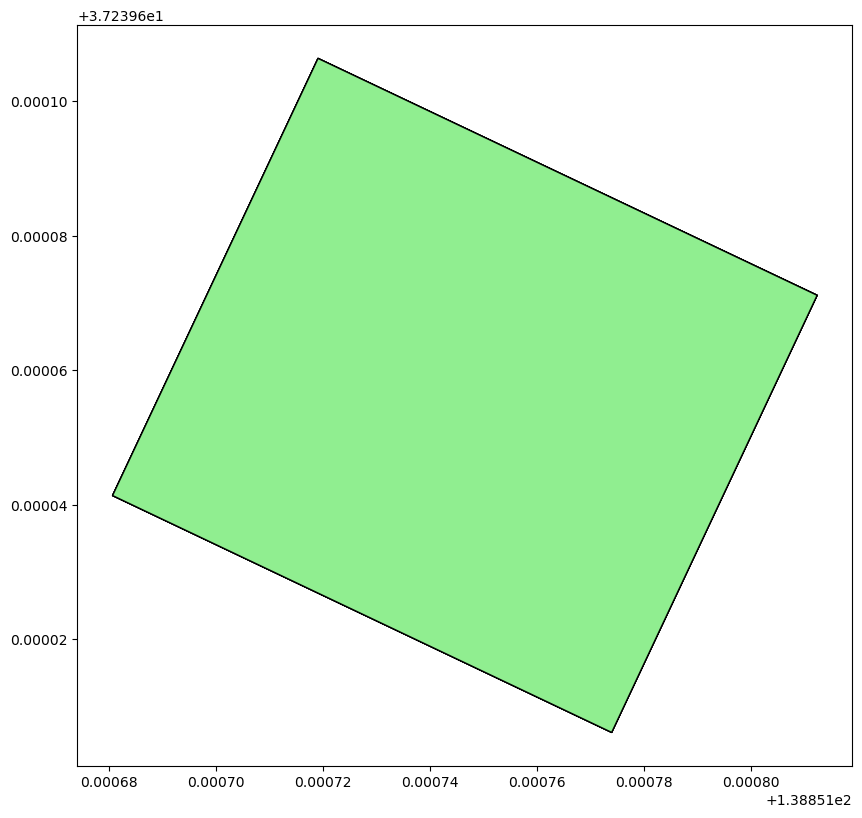

In [50]:
import matplotlib.pyplot as plt

# 元のGeoDataFrameから特定の行を取得し、GeoDataFrameに変換
gdf_row = new_plateau.iloc[[1]].copy()  # ← DataFrameでなくGeoDataFrameを得るために[]を二重にする

# 念のためCRSを再設定（元のGeoDataFrameと同じCRSを使う）
gdf_row = gpd.GeoDataFrame(gdf_row, geometry='geometry', crs=new_plateau.crs)

# 可視化（ジオメトリのみ）
gdf_row.plot(figsize=(10, 10), edgecolor='black', color='lightgreen')
plt.show()

In [ ]:
gdf.c.c.c.c.

,id,class,usage,geometry
1,bldg_62b3fc2e-b8c6-44fe-ae02-708f899b907e,3003,411,MULTIPOLYGON Z (((138.85181230816556 37.239671...
